In [1]:
"""
Uses the dataset provided here: 
https://www.kaggle.com/jacksoncrow/stock-market-dataset/data#
"""
        

'\nUses the dataset provided here: \nhttps://www.kaggle.com/jacksoncrow/stock-market-dataset/data#\n'

In [22]:
import os, datetime, random
import pandas as pd
import numpy as np
BASEDIR = os.getcwd()
STOCK_DIR_NAME = "stocks"
ETF_DIR_NAME = "etfs" #do nothing with this for now
stock_dir, etf_dir = os.path.join(BASEDIR, STOCK_DIR_NAME), os.path.join(BASEDIR, ETF_DIR_NAME)
stocks = os.listdir(stock_dir)
etfs = os.listdir(etf_dir)

In [23]:
# Dataset Statistics
print("{} total stocks".format(len(stocks)))
print("{} total etfs".format(len(etfs)))

5884 total stocks
2165 total etfs


In [29]:
"""
This cell takes awhile to run.  Computes the max and min for each stock and finds the ratio between the two.
Outputs stock above a certain ratio
"""
def find_big_changers(list_of_stocks, ratio_threshold=20):
    """
    list_of_stocks: list of csv files that can be read into panda data frames
    output: tickers and data fo stocks above the specified ratio threshold
    """
    output = []
    broken = []
    j = 1
    for fn in stocks:
        df = pd.read_csv(os.path.join(stock_dir, fn))
        low_date, low_val = df.loc[df['Low'].idxmin()]['Date'], df.min()["Low"]
        high_date, high_val = df.loc[df['High'].idxmax()]['Date'], df.max()["High"]
        try:
            ratio = high_val/low_val
        except:
            broken += fn,
            continue #something went wrong, skip this stock
        if ratio > ratio_threshold:
            output += [fn.strip(".csv"), low_date, low_val, high_date, high_val, ratio],
            j+=1
        #if j > 100: #DEBUG STATEMENT, remove later
            #break
    df = pd.DataFrame(output)
    df.columns = ['Ticker', 'Low Date', 'Low Val', 'High Date', 'High Val', 'Ratio']
    df = df.assign(date_diff = lambda x: pd.to_datetime(x['High Date']) - pd.to_datetime(x['Low Date']))
    print("Something went wrong with these stocks: {}".format(broken))
    return df





In [19]:
# Helper Functions 
def just_gainers(stock_data):
    return stock_data.loc[stock_data["date_diff"] > pd.Timedelta(0, unit="days")]

def just_losers(stock_data):
    return stock_data.loc[stock_data["date_diff"] < pd.Timedelta(0, unit="days")]

def sort_by_peak_date(stock_data):
    #TODO implement this
    pass
        
def sort_by_biggest_change(stock_data):
    #TODO implement this
    pass 
        
def shortest_time_to_change(stock_data):
    return stock_data.sort_values(by='date_diff')

def most_recent_winners(stock_data):
    sd = just_gainers(stock_data)
    return sd.sort_values(by='High Date')

def most_recent_losers(stock_data):
    sd = just_losers(stock_data)
    return sd.sort_values(by='Low Date', ascending=False)



In [ ]:
output = find_big_changers(stocks)

In [ ]:
# Useful for analyzing stocks that have gained 20+x
# These are the positive samples in our search and we want to find stocks like these
winners = just_gainers(output)

# Stocks that gained a 20+x in a short period of time.  Why? 
x = shortest_time_to_change(winners)

# TODO: get some historical financials data

In [16]:
# Might be useful for stocks that overcorrected.  
recent_losers = most_recent_losers(output)
print(recent_losers.describe())
print(recent_losers)


         Low Val      High Val         Ratio                    date_diff
count  42.000000  4.200000e+01  4.200000e+01                           42
mean    1.700340  5.030869e+06  1.005300e+07  -3927 days +17:42:51.428571
std     1.790835  3.254705e+07  6.509542e+07    2161 days 04:16:56.186655
min     0.010000  1.268000e+01  2.065657e+01         -8749 days +00:00:00
25%     0.500000  3.973500e+01  4.249731e+01         -4918 days +12:00:00
50%     1.060000  1.562852e+02  1.354493e+02         -3990 days +12:00:00
75%     2.385000  4.552500e+02  3.644043e+02         -2371 days +06:00:00
max     8.600000  2.109375e+08  4.218750e+08          -546 days +00:00:00
      Ticker    Low Date  Low Val   High Date      High Val         Ratio  \
27   ERF.csv  2020-03-30  1.15000  2006-08-07  5.945000e+01  5.169565e+01   
52  ASTC.csv  2020-03-23  0.98000  1996-04-09  8.000000e+02  8.163265e+02   
12   NTZ.csv  2020-03-23  0.40000  1997-08-12  1.465625e+02  3.664062e+02   
30   PDS.csv  2020-03-20  

'2016-01-08'

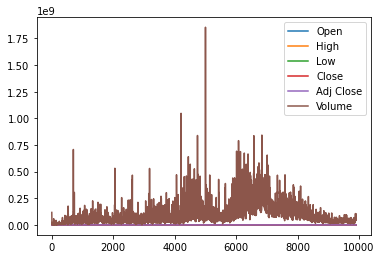

In [26]:
df.plot()

In [33]:
from numpy.random import randn
ts = pd.Series(randn(1000), index=pd.date_range('1/1/2000', periods=1000))


In [44]:
plt.figure()
df.plot(['Open', 'High', 'Low', 'Close'])
plt.legend(loc='best')

ValueError: x must be a label or position

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

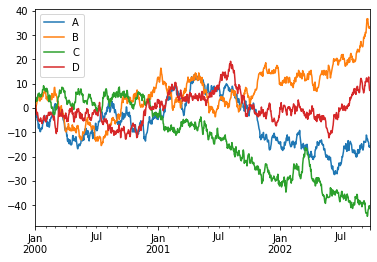

In [40]:
import matplotlib.pyplot as plt
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

'hello'